In [ ]:
!wget https://github.com/pijarpahlawan/WasteToTaste/raw/master/archive.zip .

--2024-06-03 03:24:57--  https://github.com/pijarpahlawan/WasteToTaste/raw/master/archive.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pijarpahlawan/WasteToTaste/master/archive.zip [following]
--2024-06-03 03:24:57--  https://raw.githubusercontent.com/pijarpahlawan/WasteToTaste/master/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3809213 (3.6M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]   3.63M  --.-KB/s    in 0.05s   

2024-06-03 03:24:58 (78.1 MB/s) - ‘archive.zip’ saved [3809213/3809213]

--2024-06-03 03:24:58--  http://./
R

In [ ]:
!unzip ./archive.zip

Archive:  ./archive.zip
  inflating: dataset-ayam.csv        
  inflating: dataset-ikan.csv        
  inflating: dataset-kambing.csv     
  inflating: dataset-sapi.csv        
  inflating: dataset-tahu.csv        
  inflating: dataset-telur.csv       
  inflating: dataset-tempe.csv       
  inflating: dataset-udang.csv       


# Inisialisasi Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import tabulate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

pd.set_option("display.precision", 1)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Penggabungan Data

In [ ]:
data_ayam = pd.read_csv('/content/dataset-ayam.csv')
data_ikan = pd.read_csv('/content/dataset-ikan.csv')
data_kambing = pd.read_csv('/content/dataset-kambing.csv')
data_sapi = pd.read_csv('/content/dataset-sapi.csv')
data_tahu = pd.read_csv('/content/dataset-tahu.csv')
data_telur = pd.read_csv('/content/dataset-telur.csv')
data_tempe = pd.read_csv('/content/dataset-tempe.csv')
data_udang = pd.read_csv('/content/dataset-udang.csv')

all_data = data_ayam._append([data_ikan, data_kambing, data_sapi, data_tahu, data_telur, data_tempe, data_udang])
all_data

,Title,Ingredients,Steps,Loves,URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam
...,...,...,...,...,...
1989,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega
1990,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang
1991,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe
1992,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...


# Informasi Dataset

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15641 entries, 0 to 1993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15641 non-null  object
 1   Ingredients  15593 non-null  object
 2   Steps        15595 non-null  object
 3   Loves        15641 non-null  int64 
 4   URL          15641 non-null  object
dtypes: int64(1), object(4)
memory usage: 733.2+ KB


# Drop Kolom yang Tidak Digunakan

In [ ]:
all_data = all_data.drop(columns = ['Loves', 'Steps', 'URL'])

# Pengecekan Missing Values

In [ ]:
data_miss = all_data.isnull().sum()
print(data_miss)

Title           0
Ingredients    48
dtype: int64


## Penghapusan yang memiliki missing value

In [ ]:
all_data.dropna(subset=['Ingredients'], inplace=True)
all_data.isnull().sum()

Title          0
Ingredients    0
dtype: int64

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15593 entries, 0 to 1993
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15593 non-null  object
 1   Ingredients  15593 non-null  object
dtypes: object(2)
memory usage: 365.5+ KB


# Cleaning Data

## Word Tokenize

In [ ]:
all_data['Ingredients']

0       1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...
1       1 kg ayam (dipotong sesuai selera jangan kecil...
2       1/4 kg ayam--3 buah cabai hijau besar--7 buah ...
3       250 gr daging ayam (saya pakai fillet)--Secuku...
4       400 gr kulit ayam & lemaknya--8 siung bawang p...
                              ...                        
1989    1 kg udang segar--1 buah bawang bombay kecil--...
1990    500 gr jipang(saya pk 6bh jipang muda yg kecil...
1991    3 siung bawang merah--3 siung bawang putih--2 ...
1992    Stgah ikat kacang panjang,ku bli 3ribu d psr--...
1993    3 bh dada ayam--1/2 kg udang bersih--6 bh bawa...
Name: Ingredients, Length: 15593, dtype: object

In [ ]:
all_data['Ingredients'] = all_data['Ingredients'].apply(lambda x: word_tokenize(str(x)) if type(x) == str else x)

In [ ]:
all_data['Ingredients']

0       [1, Ekor, Ayam, Kampung, (, potong, 12, ), --,...
1       [1, kg, ayam, (, dipotong, sesuai, selera, jan...
2       [1/4, kg, ayam, --, 3, buah, cabai, hijau, bes...
3       [250, gr, daging, ayam, (, saya, pakai, fillet...
4       [400, gr, kulit, ayam, &, lemaknya, --, 8, siu...
                              ...                        
1989    [1, kg, udang, segar, --, 1, buah, bawang, bom...
1990    [500, gr, jipang, (, saya, pk, 6bh, jipang, mu...
1991    [3, siung, bawang, merah, --, 3, siung, bawang...
1992    [Stgah, ikat, kacang, panjang, ,, ku, bli, 3ri...
1993    [3, bh, dada, ayam, --, 1/2, kg, udang, bersih...
Name: Ingredients, Length: 15593, dtype: object

## Melakukan Stopword Removal

In [ ]:
stopwords_id = set(stopwords.words('indonesian'))

def clean_text(text, stopwords):
    if isinstance(text, list):  # Tambahkan pengecekan jika text sudah berupa list
        text = ' '.join(text)
    words = text.split()
    cleaned_text = [word for word in words if word.lower() not in stopwords]
    return ' '.join(cleaned_text).lower()

def remove_numbers_symbols(text):
  return re.sub(r'[^a-zA-Z\s-]', '', text)

In [ ]:
def clean_ingredients(ingredients, stopwords):
    if isinstance(ingredients, list):  # Tambahkan pengecekan jika ingredients sudah berupa list
        ingredients = ' '.join(ingredients)
    # Menghapus angka dan simbol
    ingredients = remove_numbers_symbols(ingredients)
    # Membersihkan teks dengan menghapus stopwords
    cleaned_ingredients = clean_text(ingredients, stopwords)
    splitted_cleaned_ingredients = cleaned_ingredients.split()
    custom_stopwords = ['kg','gr','ekor', 'siung', 'sdm','sdt', 'sesuai',
                        'selera', 'buah', 'bh', 'lbr', 'lembar', 'cm', 'ml',
                        'batang', 'ruas','papan','potong', 'dadu', 'butir',
                        'cincang','halus','iris', 'tipi', 'tipis', 'ya', 'sendok',
                        'teh', 'makan', 'cuci', 'bersih', 'jari', 'biji',
                        'secukup', 'nya', 'pakai', 'menggoreng', 'kocok', 'lepas',
                        'skip', 'aja', 'btr', 'menumis', 'dihaluskan', 'geprek',
                        'sy', 'bk', 'yg', 'pc', 'pake', 'bungkus', 'gelas',
                        'haluskan', 'gram', 'bks', 'memanjang', 'rebus', 'suka'
                        'pedas', 'kotak', 'optional', 'matang', 'liter', 'helai',
                        'goreng', 'btg', 'utk', 'bahan', 'dipotong', 'pelengkap',
                        'tambahan', 'pcs', 'belah', 'suka', 'sejumput', 'memarkan',
                        'sangrai', 'ukuran', 'g', 'pada', 'isi', 'peda', 'pedas',
                        'lemaknya']
    cleaned_ingredients = [word for word in splitted_cleaned_ingredients
                           if word not in custom_stopwords]
    return cleaned_ingredients

In [ ]:
all_data['Ingredients'] = all_data['Ingredients'].apply(lambda x: clean_ingredients(x, stopwords_id))
all_data['Ingredients'] = all_data['Ingredients'].apply(lambda x: ' '.join(x).split('--'))
all_data.head()

,Title,Ingredients
0,Ayam Woku Manado,"[ayam kampung , jeruk nipis , garam , kunyi..."
1,Ayam goreng tulang lunak,"[ayam , serai , daun jeruk , bawang putih ,..."
2,Ayam cabai kawin,"[ayam , cabai hijau , cabai merah rawit , b..."
3,Ayam Geprek,"[daging ayam fillet , gula garam , - tepung ..."
4,Minyak Ayam,"[kulit ayam , bawang putih kating kasar , ja..."


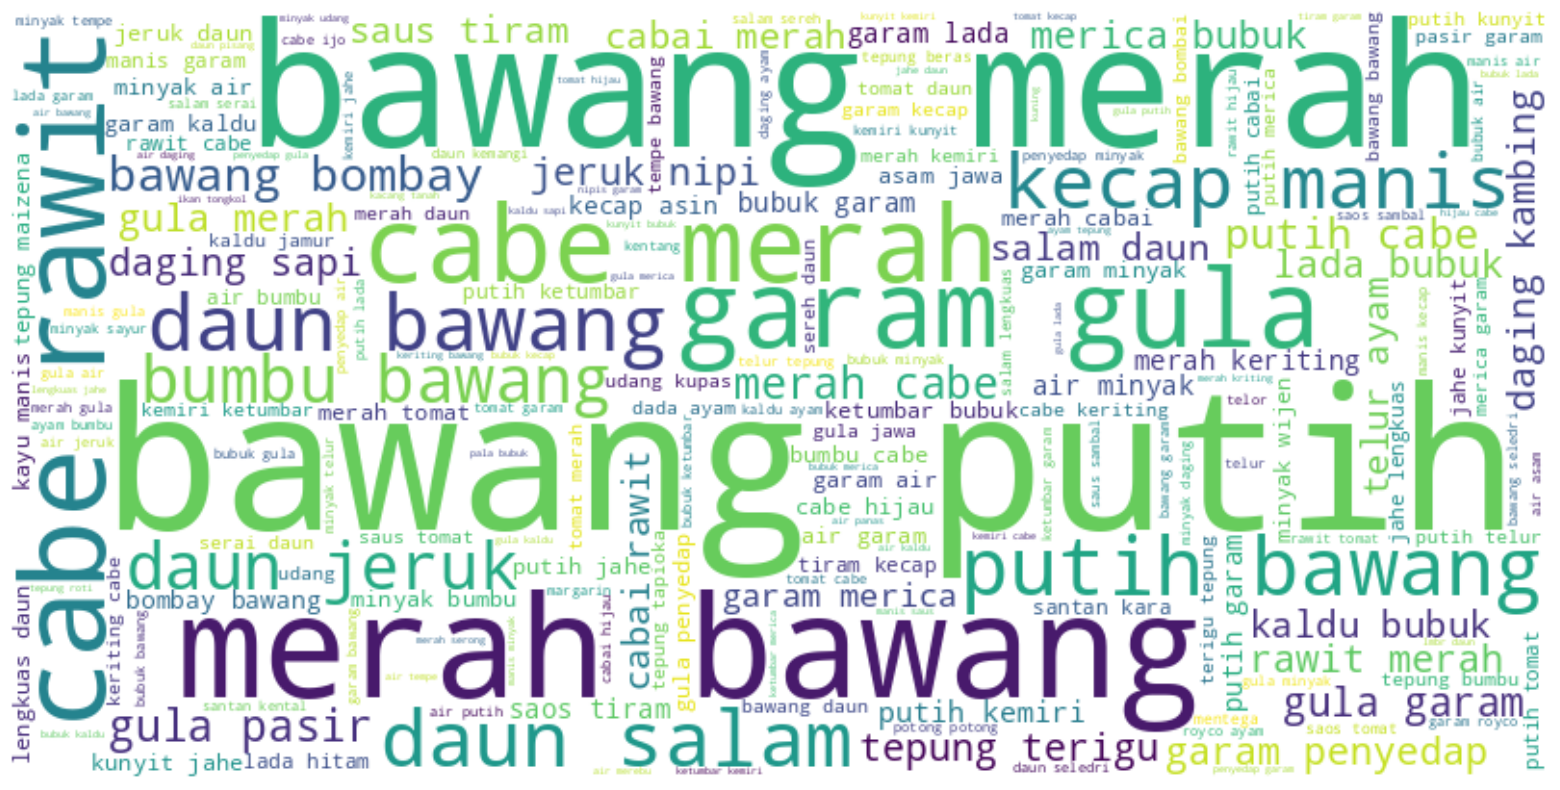

In [ ]:
ingredients_text = ' '.join([' '.join(ingredients) for ingredients in all_data['Ingredients']])

# visualisasi wordclound
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

# Preparing Train Data

In [ ]:
padding_type = 'post'

In [ ]:
def preprocess_text(text):
    text = ' '.join(text)
    text = text.strip()  # Menghapus spasi di awal dan akhir teks
    return text

In [ ]:
train_ingredients = all_data['Ingredients'].apply(lambda x: ' '.join(x).strip())
train_ingredients

0       ayam kampung   jeruk nipis   garam   kunyit   ...
1       ayam   serai   daun jeruk   bawang putih   ket...
2       ayam   cabai hijau   cabai merah rawit   bawan...
3       daging ayam fillet   gula garam   - tepung aya...
4       kulit ayam   bawang putih kating kasar   jahe ...
                              ...                        
1989    udang segar   bawang bombay   bawang putih   p...
1990    jipang pk jipang muda korek api   bawang merah...
1991    bawang merah   bawang putih   cabe rawit   tom...
1992    stgah ikat kacang ku bli ribu d psr   terong b...
1993    dada ayam   udang   bawang putih   tepung sagu...
Name: Ingredients, Length: 15593, dtype: object

In [ ]:
labels = np.array(range(len(all_data)))
labels

array([    0,     1,     2, ..., 15590, 15591, 15592])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_ingredients)
sequences = tokenizer.texts_to_sequences(train_ingredients)
word_index = tokenizer.word_index
print(f'Lenght of word index: {len(word_index)}')

Lenght of word index: 7782


In [ ]:
# Padding sequences
max_seq_length = max([len(seq) for seq in sequences])
data_padded = pad_sequences(sequences, maxlen=max_seq_length, padding=padding_type)
print(f"Shape of padded train data: {data_padded.shape}")

Shape of padded train data: (15593, 126)


# Build The Model

In [ ]:
embedding_dim = 128
vocab_size = len(word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_seq_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_data), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 126, 128)          996224    
                                                                 
 bidirectional (Bidirection  (None, 126, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 15593)             1013545   
                                                                 
Total params: 2215657 (8.45 MB)
Trainable params: 221565

In [ ]:
# Training model
history = model.fit(data_padded,
          labels,
          epochs=10)

Epoch 1/10
488/488 [==============================] - 30s 46ms/step - loss: 9.7386 - accuracy: 0.0000e+00
Epoch 2/10
488/488 [==============================] - 13s 28ms/step - loss: 9.6720 - accuracy: 0.0000e+00
Epoch 3/10
488/488 [==============================] - 12s 25ms/step - loss: 9.6717 - accuracy: 0.0000e+00
Epoch 4/10
488/488 [==============================] - 12s 24ms/step - loss: 9.6714 - accuracy: 0.0000e+00
Epoch 5/10
488/488 [==============================] - 12s 25ms/step - loss: 9.6711 - accuracy: 0.0000e+00
Epoch 6/10
488/488 [==============================] - 13s 27ms/step - loss: 9.6708 - accuracy: 0.0000e+00
Epoch 7/10
488/488 [==============================] - 19s 38ms/step - loss: 9.6705 - accuracy: 0.0000e+00
Epoch 8/10
488/488 [==============================] - 12s 25ms/step - loss: 9.6702 - accuracy: 0.0000e+00
Epoch 9/10
488/488 [==============================] - 12s 25ms/step - loss: 9.6700 - accuracy: 0.0000e+00
Epoch 10/10
488/488 [=========================

In [ ]:
# Function to recommend a recipe
def recommend_recipe(input_ingredients):
    input_ingredients = preprocess_text(input_ingredients)
    input_sequence = tokenizer.texts_to_sequences([input_ingredients])
    input_padded = pad_sequences(input_sequence, maxlen=max_seq_length, padding=padding_type)
    prediction = model.predict(input_padded)
    recommendations = np.argsort(prediction).flatten()
    recommendations_sorted = recommendations[::-1]
    top_10_recommendations = recommendations_sorted[:10]
    print(np.sort(prediction.flatten())[::-1][:10])
    print(top_10_recommendations)
    recommended_recipes = [all_data.iloc[idx] for idx in top_10_recommendations]
    return recommended_recipes

# Example usage
input_ingredients = "ayam, tomat, telur"
recommended_recipe = recommend_recipe(input_ingredients)
for recipe in recommended_recipe:
    print(f"Title: {recipe['Title']}")
    print(f"Ingredients: {recipe['Ingredients']}")
    print("\n")

1/1 [==============================] - 0s 24ms/step
[7.6912387e-05 7.6856879e-05 7.6100994e-05 7.6084085e-05 7.6065618e-05
 7.6060409e-05 7.6052755e-05 7.6051278e-05 7.6019242e-05 7.6014490e-05]
[11040  3934  8434  7829  6717  4268  3294 14465  9191   444]
Title: Telur ceplok kecap
Ingredients: ['telur ceplok ditaburi garam parsley ', ' bawang merah ', ' bawang putih ', ' bawang bombay ', ' cabai rawit ', ' tomat ', ' garam gula kecap manis asin merica parsley ', ' air ', '']


Title: Sate kambing goreng
Ingredients: ['daging kambing ', ' bawang merah ', ' bawang putih ', ' - jahe ', ' lengkuas ', ' kemiri ', ' kecap ', ' garam merica gula ', ' air belimbing ', ' minyak ', ' cabe merah cabe rawit tomat ', '']


Title: Peyek tahu
Ingredients: ['putih ', ' tepung beras ', ' telur ', ' masako ayam ', ' garan ', ' merica bubuk ', ' daun jeruk purut ', ' air minyak ', '']


Title: Perkedel Tahu Sayur Super Kilat
Ingredients: ['putih ', ' ons kubis ', ' wortel ', ' tangkai bawang pre ', ' se

In [ ]:
model.save('recipe_recommendation_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 936.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
   

In [ ]:
!tensorflowjs_converter --input_format=keras "./recipe_recommendation_model.h5" ./

2024-06-02 16:23:01.643858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 16:23:03.383807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Content-Based Filtering